<a href="https://colab.research.google.com/github/LivenetsTatiana/works/blob/main/MachineLearning/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### **<center>Лабораторная работа 3. Логистическая регрессия<center/>**
**Цель**: исследовать возможности анализа признаков в датасете и способы
нормализации данных.

**Исходные данные:** датасет с площадки Kaggle

**Задания:**
1. Ознакомиться со статьей
2. Повторить весь процесс, реализованный в статье (есть некоторые подводные камни, результат должен получиться немного лучше)
3. Прокомментировать весь код, используя # для построчного комментирования или markdown перед кодом
4. Написать выводы о проделанной работе (что именно реализовано в статье, какого типа исследование и какой результат)
5. На площадке Kaggle найти датасет (учитывайте требования к набору данных для логистической регрессии)
6. Реализовать модель логистической регрессии, используя библиотеку sklearn.



# **Анализ статьи**

Логистическая регрессия — это алгоритм классификации в машинном обучении для прогнозирования вероятности категориально зависимой переменной. В логистической регрессии зависимые переменные — это двоичные (бинарные) переменные, содержащие 1 (да, успех, и так далее) или 0 — нет, неудача, и так далее. Другими словами, логистическая регрессия прогнозирует P(Y=1) как функцию от X.

Допущения логистической регрессии:

* Двоичная логистическая регрессия требует двоичной зависимой переменной.
* В случае двоичной регрессии уровень фактора 1 должен представлять из себя желаемый исход.
* Включены должны быть только значимые переменные.
* Независимые переменные должны быть независимы друг от друга, то есть модель должна обладать малой мультиколлинеарностью или не обладать ею.
* Зависимые переменные линейно связаны с логарифмическими коэффициентами.
* Логистическая регрессия требует довольно большого размера выборок.

## **Данные**

Набор данных из реозитория связан с целевыми маркетинговыми компаниями (телефонными звонками) Португальского банка. Задача классификации — спрогнозировать (0/1), то есть откроет ли клиент срочный вклад (переменная y).

In [ ]:
# необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
# читаем данные
data = pd.read_csv('banking.csv', header=0)
data = data.dropna() # удаляем пропуски
print(data.shape) # выводим размер таблицы
print(list(data.columns)) # и сами данные в виде списка

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [ ]:
data.head() # выводим дынные в виде таблицы

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


age: возраст (числовая);

job: работа (категориальная: "admin", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown");

marital: семейное положение (категориальная: "divorced", "married", "single", "unknown");

education: образование (категориальная: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown");

default: есть невыплаченный кредит? (категориальная: "no", "yes", "unknown");

housing: есть жилищный кредит? (категориальная: "no", "yes", "unknown");
loan: есть кредит на личные нужды? (категориальная: "no", "yes", "unknown");

contact: мобильный или стационарный телефон? (категориальная: "cellular", "telephone");

month: месяц последнего звонка (категориальная: "jan", "feb", "mar", …, "nov", "dec");

day_of_week: день недели последнего звонка (категориальная: "mon", "tue", "wed", "thu", "fri");

duration: продолжительность разговора в секундах (числовая). Важное примечание: этот атрибут сильно влияет на конечный результат (например, если duration=0, то y=’no’); Продолжительность не известна до выполнения вызова, кроме того, после окончания вызова y, очевидно, известна. Таким образом, эти входные данные должны включаться только для сравнения и отбрасываться, когда нужна реалистичная прогностическая модель;

campaign: число контактов в ходе этой кампании и для этого клиента (числовая), включая последний контакт);

pdays: количество дней, прошедших с последнего контакта с клиентом, с предыдущей кампании (числовая); 999 означает, что ранее контакта не было);

previous: количество контактов до этой кампании для данного клиента (числовая)

poutcome: исход предыдущей кампании (категориальная: "failure", "nonexistent", "success")

emp.var.rate: коэффициент вариации занятости — (числовая);

cons.price.idx: индекс потребительских цен — (числовая);

cons.conf.idx: индекс доверия потребителей — (числовая);

euribor3m: ставка EURIBOR за 3 месяца — (числовая);

nr.employed: количество работников — (числовая).


Наша цель — прогноз переменной Y, то есть того, есть ли у клиента срочный вклад? (0 — нет, 1 — да).


У поля об образовании (education) много категорий. Чтобы сделать модель лучше, количество этих категорий нужно сократить:

In [ ]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

Для этого сгруппируем "basic.4y", "basic.9y" и "basic.6y", назовём их "Basic":

In [ ]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

Вот поля после группировки:

In [ ]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

## **Исследование данных**

In [ ]:
data['y'].value_counts() # выводим сколько клиентов без вклада (0), а сколько с вкладом (1)

0    36548
1     4640
Name: y, dtype: int64

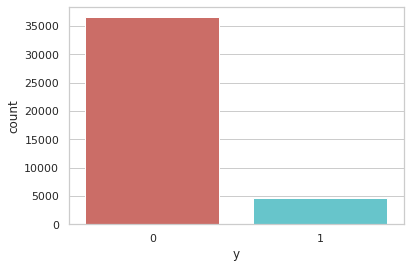

In [ ]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [ ]:
# находим число людей с вкладом и без в процентном соотношении
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


Классы наших данных не сбалансированы, а соотношение клиентов без вклада и с вкладом составляет 89 к 11. До балансировки классов проведём ещё несколько исследований:



In [ ]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Вот новые наблюдения:


* Средний возраст клиентов, открывших вклад, выше среднего возраста тех, кто этого не сделал.

* Количество дней с последнего контакта с клиентом по понятным причинам меньше у клиентов, открывших депозит. А чем она меньше, тем лучше запомнился последний звонок, а значит, выше шанс открытия счёта.

* Удивительно, но кампания, то есть количество звонков за одну кампанию, меньше у клиентов, которые открыли депозит.

Чтобы чётче представлять данные, рассчитаем категориальное среднее других категориальных переменных, таких как образование и семейное положение.

In [ ]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [ ]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [ ]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


## **Визуализация**

Text(0, 0.5, 'Frequency of Purchase')

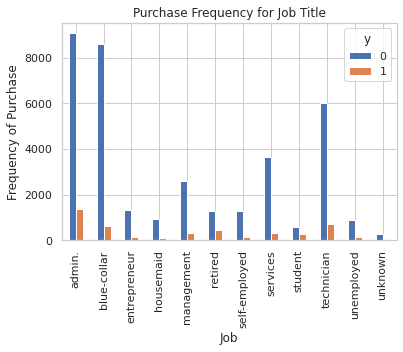

In [ ]:
%matplotlib inline
# указывает, что график выводится как обычная картинка
pd.crosstab(data.job,data.y).plot(kind='bar') # Функция crosstab создает таблицу кросс-табуляции, которая может показать частоту, с которой появляются определенные группы данных
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

Частота открытия депозита во многом зависит от должности клиента, а значит, эта категориальная переменная может служить хорошим фактором прогнозирования.

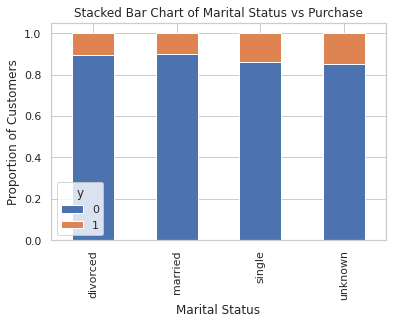

In [ ]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) # нормируем данные (чтобы отобразить процент открытых
# и не открытых дипозитов для каждой уникального семейного положения)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Семейное положение сильным фактором прогнозирования не выглядит.

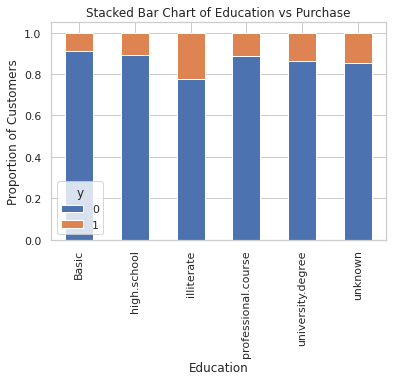

In [ ]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Также хорошим фактором прогнозирования выглядит категория образования.

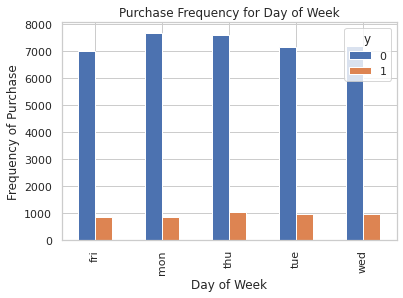

In [ ]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

А день недели — нет.

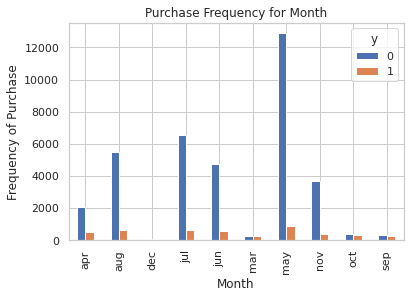

In [ ]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
print()

Хорошим фактором прогнозирования может быть месяц.

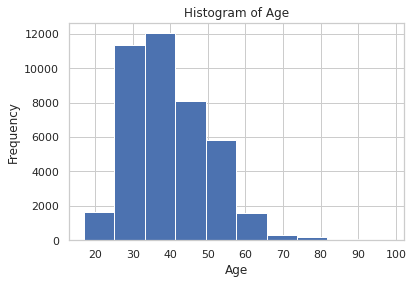

In [ ]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Большинству клиентов банка в этом наборе данных от 30 до 40 лет.

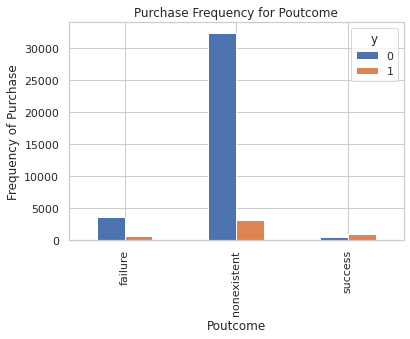

In [ ]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')


Наконец, хорошим фактором прогнозирования выглядит Poutcome.

## **Переменные-заглушки**

Эти переменные содержат только значения 0 и 1.

In [ ]:
# создаем переменные-заглушки (вместо категориальных признаков - 0 или 1 для каждого уникальногозначения в категориальном столбце)
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var) # преобразование категориальной переменной в фиктивные/индикаторные переменные.
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

## **Обогащение синтетическими данными через SMOTE**

Увеличиваем выборку данных о клиентах без вклада при помощи алгоритма SMOTE (Synthetic Minority Oversampling Technique). На высоком уровне он работает так:

Генерирует синтетические выборки из минорного класса, а не создаёт копии.
Случайно выбирает одного из k ближайших соседей и использует его, чтобы создать подобное, но случайно подстроенное наблюдение.


In [ ]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train) # создаем новые данные на основе имеющихся
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Теперь данные сбалансированы идеально! При этом увеличены выборки только тренировочных данных; никакая информация из тестовых данных не используется для генерации синтетических наблюдений, то есть никакая информация тестового набора не утечёт в обучающие данные.

## **Рекурсивное устранение признаков**

Рекурсивные устранение признаков построено на идее повторяющегося конструирования модели и выбора лучших и худших в смысле производительности признаков, а затем  отбрасывания признака и повторения процесса до исчерпания всех данных. Цель — выбирать признаки, рекурсивно рассматривая всё меньшие и меньшие их множества.

In [ ]:
# Отбираем признаки из числа имеющихся
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select = 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
 False False  True  True False  True  True  True False False False  True
  True  True  True  True  True  True  True False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[33 36 31 38 30 24 27 41 28 32 19 11 13 12 18 40 17 14 23 16 20 15  1  1
  2 35  1  1 39  1  1  1 37 25 42  1  1  1  1  1  1  1  1 10  5 22  7  9
 29  8  6 34 26  1  1  1  1  1  4  3 21]


In [ ]:
# Определяем признаки, которые получилось выбрать с помощью метода
a = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success']
b = [False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False, False, False, False,  True,  True,
 False, False,  True , True, False , True  ,True , True, False ,False ,False , True,
  True , True , True , True  ,True,  True,  True, False, False, False, False, False,
 False, False, False, False, False,  True,  True,  True,  True,  True, False, False, False]
c = []
for i in range (len(a)):
  if (b[i]):
    c.append(a[i])
c

['marital_divorced',
 'marital_married',
 'education_Basic',
 'education_high.school',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed']

In [ ]:
# Теперь будем работать именно с этими признаками
cols=['marital_divorced',
 'marital_married',
 'education_Basic',
 'education_high.school',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed']
X=os_data_X[cols]
y=os_data_y['y']

## **Реализация модели**

In [ ]:
# Строим модель по выбранным признакам
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.384345
         Iterations 7
                                        Results: Logit
Model:                        Logit                      Pseudo R-squared:           0.446     
Dependent Variable:           y                          AIC:                        39344.2052
Date:                         2023-03-19 08:44           BIC:                        39512.2071
No. Observations:             51134                      Log-Likelihood:             -19653.   
Df Model:                     18                         LL-Null:                    -35443.   
Df Residuals:                 51115                      LLR p-value:                0.0000    
Converged:                    1.0000                     Scale:                      1.0000    
No. Iterations:               7.0000                                                           
---------------------------------------------------------------------------

p-значение большинства переменных меньше 0,05, кроме двух, которые мы удалим:

In [ ]:
cols=['marital_divorced',
 'marital_married',
 'education_Basic',
 'education_high.school',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed']
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.384722
         Iterations 7
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.445     
Dependent Variable:      y                    AIC:                  39380.7372
Date:                    2023-03-19 08:44     BIC:                  39539.8968
No. Observations:        51134                Log-Likelihood:       -19672.   
Df Model:                17                   LL-Null:              -35443.   
Df Residuals:            51116                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          7.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

## **Обучение модели логистической регрессии**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Прогноз на тестовом наборе и расчёт точности:

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


## **Сonfusion matrix**

— это таблица, которая используется для определения производительности алгоритма классификации.

$$
\begin{array}{|c|c|}
\hline \begin{array}{c}
\text { True Positive (истинно-положительное решение):  } \\
\text { прогноз совпал с реальностью, результат положительный  } \\
\text { произошел, как и было предсказано ML-моделью  }
\end{array} & \begin{array}{c}
\text { False Positive (ложноположительное решение): ошибка 1-го рода, } \\
\text {  ML-модель предсказала положительный результат,  } \\
\text {  а на самом деле он отрицательный }
\end{array} \\
\hline \begin{array}{c}
\text { False Negative (ложноотрицательное решение):   } \\
\text {  ошибка 2-го рода – ML-модель предсказала отрицательный  } \\
\text {  результат, но на самом деле он положительный }
\end{array} & \begin{array}{c}
\text { True Negative (истинно-отрицательное решение): } \\
\text {  результат отрицательный, ML-прогноз совпал с реальностью }
\end{array} \\
\hline
\end{array}
$$

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7612   54]
 [1127 6548]]


У нас 7612+6548=14160 верных и 54+1127=1181 неверных прогнозов.

## **Расчёт точности, полноты, F-меры и носителя**

**Точность** — это отношение tp/(tp + fp), где tp — число истинных и ложных срабатываний, а интуитивно — это способность модели не отмечать истинные примеры как ложные.


**Полнота** — это отношение tp/(tp + fn), то есть числа истинных и ложных срабатываний, а интуитивно — способность модели найти все истинные примеры.


**Оценку F-beta** можно понимать как взвешенное гармоническое среднее точности и полноты. Лучшее значение оценки — 1, худшее — 0. Эта оценка взвешивает полноту тщательнее точности, умножая её на коэффициент бета. Бета, равная 1.0, означает одинаковую важность полноты и точности.


**Носитель** — это количество вхождений каждого класса в y_test.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      7666
           1       0.99      0.85      0.92      7675

    accuracy                           0.92     15341
   macro avg       0.93      0.92      0.92     15341
weighted avg       0.93      0.92      0.92     15341



Интерпретация:

93% рекламируемых срочных депозитов из набора данных понравились клиентам (способность модели не отмечать истинные примеры как ложные)

92% срочных депозитов, которые предпочли клиенты, были прорекламированы (способность модели найти все истинные примеры)

## **ROC-кривая**

ROC-кривая отражает чувствительность модели к разным порогам классификации.

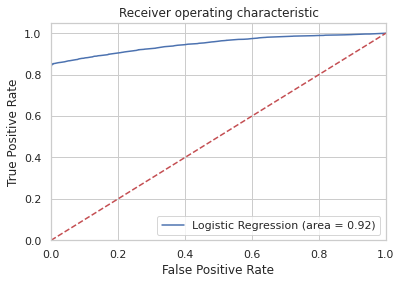

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Рабочая характеристика приёмника (ROC) — другой распространённый в бинарной классификации инструмент. Пунктирная линия здесь представляет кривую рабочей характеристики приёмника для чисто случайного классификатора, при этом график хорошего классификатора держится от пунктира как можно дальше, к левому верхнему углу (идеальная модель — та, в которой доля истинно положительных результатов максимально высока, в то же время доля ложно положительных результатов удерживается как можно ниже)

## **Вывод**

В данной статье решалась задача классификации — спрогнозировать (0/1), то есть откроет ли клиент срочный вклад (переменная y) по имеющимся данным. После анализа датасета, приведение его к виду удобному для построения классификатора и обогощения его синтетическими данными было произведено рекурсивное устранение признаков и затем обучение модели линейной регрессии. В итоге получилось составить модель логистической регрессии, которая классифицирует объекты с точностью 92%, что является хорошим результатом.

# **Логистическая регрессия на выбранном датасете**

## **Загружаем датасет**

In [ ]:
# необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Подключение к kaggle для взятия данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! kaggle datasets download -d ulrikthygepedersen/airlines-delay

airlines-delay.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip airlines-delay.zip

Archive:  airlines-delay.zip
replace airlines_delay.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
data = pd.read_csv('airlines_delay.csv')

In [ ]:
data = data.dropna()
print(data.shape)
print(list(data.columns))

(539382, 8)
['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Class']


In [ ]:
data.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


Набор данных связан с рейсами самолетов. Задача классификации — спрогнозировать (0/1), то есть будет ли задержка рейса (переменная class).

flight: номер полета (числовая)

time: время вылета(числовая)

lenght: время полета (числовая)

airline: авиакомпания (категориальная)

AirportFrom: аэропорт вылета (категориальная)

AirportTo: аэропорт прилета (категориальная)

DayOfWeek: день недели (категориальная)

Class: было ли опоздание или нет (числовая 1 - опоздал, 0 - не опоздал)


Наша цель — прогноз переменной Class, то есть того, есть того будет задержка рейса или нет? (0 — нет, 1 — да).

## **Исследование данных**

In [ ]:
data['Class'].value_counts() # выводим сколько рейсов без задержек (0), а сколько с задержками (1)

0    299118
1    240264
Name: Class, dtype: int64

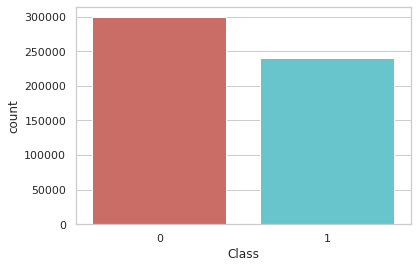

In [ ]:
sns.countplot(x='Class',data=data, palette='hls')
plt.show()

In [ ]:
# находим число рейсов с задержкой и без в процентном соотношении
count_no_sub = len(data[data['Class']==0])
count_sub = len(data[data['Class']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no delays is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of delays", pct_of_sub*100)

percentage of no delays is 55.45568817646862
percentage of delays 44.54431182353137


Классы наших данных сбалансированы.



## **Визуализация**

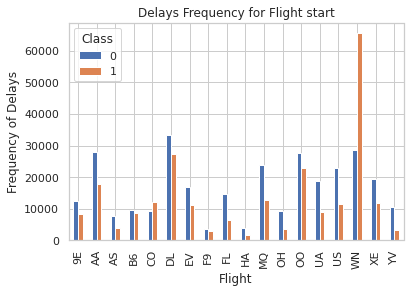

In [ ]:
%matplotlib inline
# указывает, что график выводится как обычная картинка
pd.crosstab(data.Airline,data.Class).plot(kind='bar') # Функция crosstab создает таблицу кросс-табуляции, которая может показать частоту, с которой появляются определенные группы данных
plt.title('Delays Frequency for Airline')
plt.xlabel('Airline')
plt.ylabel('Frequency of Delays')
print()

Авиакампания является хорошим фактором прогнозирования

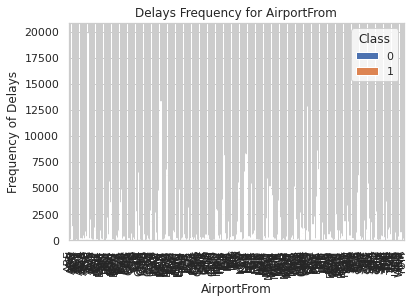

In [ ]:
pd.crosstab(data.AirportFrom,data.Class).plot(kind='bar') # Функция crosstab создает таблицу кросс-табуляции, которая может показать частоту, с которой появляются определенные группы данных
plt.title('Delays Frequency for AirportFrom')
plt.xlabel('AirportFrom')
plt.ylabel('Frequency of Delays')
print()

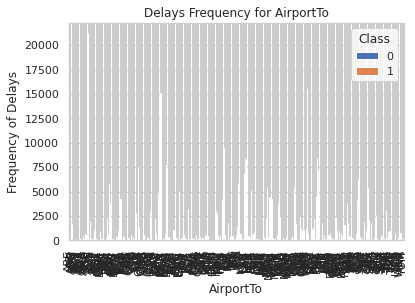

In [ ]:
pd.crosstab(data.AirportTo,data.Class).plot(kind='bar') # Функция crosstab создает таблицу кросс-табуляции, которая может показать частоту, с которой появляются определенные группы данных
plt.title('Delays Frequency for AirportTo')
plt.xlabel('AirportTo')
plt.ylabel('Frequency of Delays')
print()

А аэропорт вылета и прилета - нет, так как содержат слишком много уникальных значений

Также хорошим фактором прогнозирования выглядит категория образования.

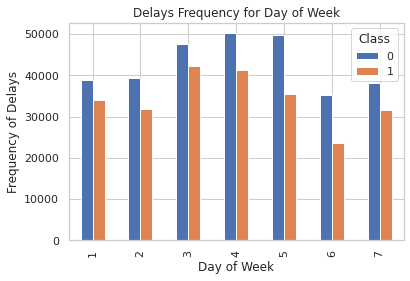

In [ ]:
pd.crosstab(data.DayOfWeek,data.Class).plot(kind='bar')
plt.title('Delays Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Delays')
plt.savefig('pur_dayofweek_bar')

День недели - не очень хороший

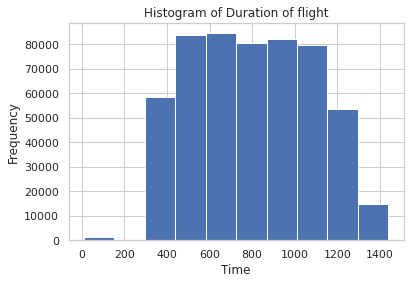

In [ ]:
data.Time.hist()
plt.title('Histogram of Time of flight')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.savefig('hist_time')

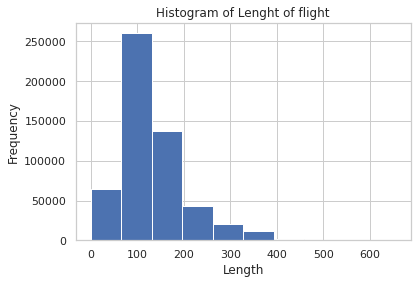

In [ ]:
data.Length.hist()
plt.title('Histogram of Lenght of flight')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.savefig('hist_time')

## **Переменные-заглушки**

Эти переменные содержат только значения 0 и 1.

In [ ]:
# создаем переменные-заглушки (вместо категориальных признаков - 0 или 1 для каждого уникальногозначения в категориальном столбце)
cat_vars=['Airline'] # оставляем одну категориальную переменную, т. к в остальных много уникальных значений и с ними все летит
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var) # преобразование категориальной переменной в фиктивные/индикаторные переменные.
    data1=data.join(cat_list)
    data=data1

data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values

array(['Flight', 'Time', 'Length', 'AirportFrom', 'AirportTo',
       'DayOfWeek', 'Class', 'Airline_9E', 'Airline_AA', 'Airline_AS',
       'Airline_B6', 'Airline_CO', 'Airline_DL', 'Airline_EV',
       'Airline_F9', 'Airline_FL', 'Airline_HA', 'Airline_MQ',
       'Airline_OH', 'Airline_OO', 'Airline_UA', 'Airline_US',
       'Airline_WN', 'Airline_XE', 'Airline_YV'], dtype=object)

## **Рекурсивное устранение признаков**

Рекурсивные устранение признаков построено на идее повторяющегося конструирования модели и выбора лучших и худших в смысле производительности признаков, а затем  отбрасывания признака и повторения процесса до исчерпания всех данных. Цель — выбирать признаки, рекурсивно рассматривая всё меньшие и меньшие их множества.

In [ ]:
# Отбираем признаки из числа имеющихся
X = data_final.loc[:, data_final.columns != 'Class']
X = X.loc[:, X.columns != 'AirportFrom'] # Часть столбцов убираем, потому что при создании заглушек с этими столцами получается 600
# столбцов и все вылетает, поэтому рассмоитрим без них
X = X.loc[:, X.columns != 'AirportTo']
y = data_final.loc[:, data_final.columns == 'Class']
data_X = pd.DataFrame(data=X,columns=X.columns )
data_y= pd.DataFrame(data=y,columns=['Class'])
data_final_vars=data_final.columns.values.tolist()
y=['Class']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 10) # определяем сколько признаков отобрать в n_features_to_select
rfe = rfe.fit(data_X, data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[False False False False False False False  True  True  True False  True
  True  True False  True  True False False  True False  True]
[13 12 11  8 10  7  4  1  1  1  9  1  1  1  5  1  1  2  3  1  6  1]


In [ ]:
# Определяем признаки, которые получилось выбрать с помощью метода
a = ['Flight', 'Time', 'Length',
       'DayOfWeek', 'Airline_9E', 'Airline_AA', 'Airline_AS',
       'Airline_B6', 'Airline_CO', 'Airline_DL', 'Airline_EV',
       'Airline_F9', 'Airline_FL', 'Airline_HA', 'Airline_MQ',
       'Airline_OH', 'Airline_OO', 'Airline_UA', 'Airline_US',
       'Airline_WN', 'Airline_XE', 'Airline_YV']
b = [False, False, False ,False ,False ,False ,False,  True  ,True , True, False,  True,
  True  ,True, False , True , True ,False, False,  True ,False,  True]
c = []
for i in range (len(a)):
  if (b[i]):
    c.append(a[i])
c

['Airline_B6',
 'Airline_CO',
 'Airline_DL',
 'Airline_F9',
 'Airline_FL',
 'Airline_HA',
 'Airline_OH',
 'Airline_OO',
 'Airline_WN',
 'Airline_YV']

In [ ]:
# Теперь будем работать именно с этими признаками
cols=['Airline_B6',
 'Airline_CO',
 'Airline_DL',
 'Airline_F9',
 'Airline_FL',
 'Airline_HA',
 'Airline_OH',
 'Airline_OO',
 'Airline_WN',
 'Airline_YV']
X=data_X[cols]
y=data_y['Class']

## **Реализация модели**

In [ ]:
# Строим модель по выбранным признакам
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.667917
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.028      
Dependent Variable: Class            AIC:              720545.2194
Date:               2023-03-19 18:35 BIC:              720657.2011
No. Observations:   539382           Log-Likelihood:   -3.6026e+05
Df Model:           9                LL-Null:          -3.7065e+05
Df Residuals:       539372           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Airline_B6    -0.1320    0.0149   -8.8656  0.0000  -0.1612  -0.1028
Airline_CO     0.2664    0.0139   19.1835  0.0000

## **Обучение модели логистической регрессии**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Прогноз на тестовом наборе и расчёт точности:

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X, y)))

Accuracy of logistic regression classifier on test set: 0.63


## **Сonfusion matrix**

— это таблица, которая используется для определения производительности алгоритма классификации.

$$
\begin{array}{|c|c|}
\hline \begin{array}{c}
\text { True Positive (истинно-положительное решение):  } \\
\text { прогноз совпал с реальностью, результат положительный  } \\
\text { произошел, как и было предсказано ML-моделью  }
\end{array} & \begin{array}{c}
\text { False Positive (ложноположительное решение): ошибка 1-го рода, } \\
\text {  ML-модель предсказала положительный результат,  } \\
\text {  а на самом деле он отрицательный }
\end{array} \\
\hline \begin{array}{c}
\text { False Negative (ложноотрицательное решение):   } \\
\text {  ошибка 2-го рода – ML-модель предсказала отрицательный  } \\
\text {  результат, но на самом деле он положительный }
\end{array} & \begin{array}{c}
\text { True Negative (истинно-отрицательное решение): } \\
\text {  результат отрицательный, ML-прогноз совпал с реальностью }
\end{array} \\
\hline
\end{array}
$$

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[78622 11362]
 [48584 23247]]


У нас 78622+23247 верных и 48584+11362 неверных прогнозов.

## **Расчёт точности, полноты, F-меры и носителя**

**Точность** — это отношение tp/(tp + fp), где tp — число истинных и ложных срабатываний, а интуитивно — это способность модели не отмечать истинные примеры как ложные.


**Полнота** — это отношение tp/(tp + fn), то есть числа истинных и ложных срабатываний, а интуитивно — способность модели найти все истинные примеры.


**Оценку F-beta** можно понимать как взвешенное гармоническое среднее точности и полноты. Лучшее значение оценки — 1, худшее — 0. Эта оценка взвешивает полноту тщательнее точности, умножая её на коэффициент бета. Бета, равная 1.0, означает одинаковую важность полноты и точности.


**Носитель** — это количество вхождений каждого класса в y_test.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.87      0.72     89984
           1       0.67      0.32      0.44     71831

    accuracy                           0.63    161815
   macro avg       0.64      0.60      0.58    161815
weighted avg       0.64      0.63      0.60    161815



Интерпретация:

64% опозданий рейсов не были отмечаны как не опоздания (способность модели не отмечать истинные примеры как ложные)

63% опозданий отмечены и действительно являются таковыми(способность модели найти все истинные примеры)

## **ROC-кривая**

ROC-кривая отражает чувствительность модели к разным порогам классификации.

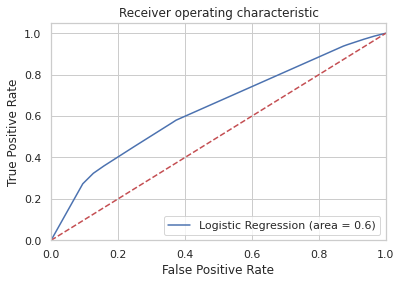

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.1f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Рабочая характеристика приёмника (ROC) — другой распространённый в бинарной классификации инструмент. Пунктирная линия здесь представляет кривую рабочей характеристики приёмника для чисто случайного классификатора, при этом график хорошего классификатора держится от пунктира как можно дальше, к левому верхнему углу (идеальная модель — та, в которой доля истинно положительных результатов максимально высока, в то же время доля ложно положительных результатов удерживается как можно ниже)

## **Вывод**

На данном датасете решалась задача классификации — спрогнозировать (0/1)задержится ли рейс (переменная Class) по имеющимся данным. После анализа датасета, приведение его к виду удобному для построения классификатора (в том числе отбрасывания части категориальных признаков в виду огромного количества уникальных значений) было произведено рекурсивное устранение признаков и затем обучение модели линейной регрессии. В итоге получилось составить модель логистической регрессии, которая классифицирует объекты с точностью 63%. При этом повышения количества отбираемых признаков для модели логистической регрессии не приводит к повышению точности (после признаков отвечающих за авиалинии добавляется день недели, но точность от этого не увеличивается)